In [1]:
import investpy

In [2]:
df = investpy.get_historical_data('endesa', '01/01/2000', '01/01/2019')

In [3]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2011-06-24,21.910,22.46,21.76,22.23,387130
2011-06-27,21.940,22.05,21.76,21.87,317400
2011-06-28,22.110,22.22,21.81,21.97,313830
2011-06-29,22.605,22.63,22.23,22.23,256290
2011-06-30,22.960,23.09,22.54,22.63,852370


In [4]:
len(df)

1924

In [5]:
df.describe()

,Close,High,Low,Open,Volume
count,1924.000000,1924.000000,1924.000000,1924.000000,1.924000e+03
mean,16.514761,16.677868,16.346246,16.520087,1.095860e+06
std,3.435027,3.454310,3.427306,3.446053,1.226298e+06
min,8.416000,8.550000,8.340000,8.418000,6.165000e+04
25%,14.751250,14.900000,14.577500,14.742750,3.742825e+05
50%,17.347500,17.550000,17.172500,17.360000,8.823650e+05
75%,19.031250,19.216250,18.900000,19.070000,1.470000e+06
max,22.960000,23.090000,22.590000,22.800000,3.094000e+07


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import copy

In [8]:
aux = copy.deepcopy(df)

In [9]:
aux.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [10]:
aux = aux.drop(columns=['Volume'])

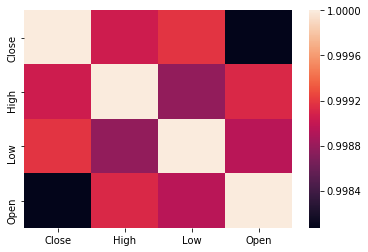

In [11]:
sns.heatmap(aux.corr())

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor

In [13]:
X = [[value] for value in df['Open'].values]
y = df['Close'].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=False)

In [14]:
mlp_close = MLPRegressor(activation='relu', hidden_layer_sizes=13, learning_rate='constant', shuffle=False, solver='lbfgs')
mlp_close.fit(X_train, y_train)

prediction = mlp_close.predict(X_test)

print(mlp_close.score(X_test, y_test))

0.9566809046137186


In [15]:
X = [[value] for value in df['Close'].values]
y = df['Open'].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=False)

In [16]:
mlp_open = MLPRegressor(activation='relu', hidden_layer_sizes=13, learning_rate='constant', shuffle=False, solver='lbfgs')
mlp_open.fit(X_train, y_train)

prediction = mlp_open.predict(X_test)

print(mlp_open.score(X_test, y_test))

0.9562573901924863


In [17]:
prediction

array([20.57078868, 20.17543011, 20.26050727, 20.18043465, 20.11537564,
       19.94021678, 19.92520316, 19.94021678, 19.63994444, 19.86514869,
       19.86514869, 19.85013508, 19.87515777, 19.94021678, 20.08534841,
       19.97524855, 19.84513054, 19.70500345, 19.7500443 , 20.44567521,
       20.28552996, 19.86514869, 20.01528486, 20.23048003, 20.19544826,
       20.3806162 , 20.60081592, 20.47570244, 20.58079776, 20.52074329,
       20.50572968, 20.20545734, 20.61082499, 20.63084315, 20.82602017,
       20.88607463, 20.64085223, 20.68088854, 20.59080684, 20.62083407,
       20.56578414, 20.44567521, 20.40063436, 20.51073421, 20.26551181,
       20.27051635, 20.28052542, 20.21046188, 20.7659657 , 20.76096116,
       20.75095208, 20.57579322, 20.81100655, 20.73093393, 20.49071606,
       20.0202894 , 20.12538472, 20.01028032, 20.16041649, 19.89517593,
       19.59490359, 19.30464033, 19.4547765 , 19.29963579, 19.22957225,
       19.01437707, 19.07943608, 18.69909112, 18.74413197, 18.25

In [18]:
aux['ds'] = aux.index.tolist()
aux['y'] = aux['Close'].values.tolist()

aux.reset_index()

aux = aux.drop(columns=['Close', 'High', 'Low', 'Open'])

In [19]:
aux.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
import sys
!{sys.executable} -m pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(aux)

In [ ]:
future = m.make_future_dataframe(periods=5)

In [ ]:
forecast = m.predict(future)

In [ ]:
m.plot_components(forecast)